<a href="https://colab.research.google.com/github/YashviShahBvn/AI-Mini-Projects/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# All libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits #using prebuilt dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [2]:
# loading data, preprocesing, spliting

digits = load_digits()
X, y = digits.data, digits.target

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Need of Normalization
Normalization is important in training neural networks to converge using gradient descent, also it prevents domination of features with larger values

In [3]:
# Build neural network
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(64,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3535 - loss: 1.9852 - val_accuracy: 0.7882 - val_loss: 0.9977
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7852 - loss: 0.9228 - val_accuracy: 0.9062 - val_loss: 0.4810
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8767 - loss: 0.5029 - val_accuracy: 0.9167 - val_loss: 0.3387
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9223 - loss: 0.3275 - val_accuracy: 0.9271 - val_loss: 0.2755
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9312 - loss: 0.2705 - val_accuracy: 0.9306 - val_loss: 0.2427
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9608 - loss: 0.1718 - val_accuracy: 0.9340 - val_loss: 0.2201
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9683 - loss: 0.1344 - val_accuracy: 0.9340 - val_loss: 0.2122
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9610 - loss: 0.1309 - val_accuracy: 0.9340 - val_loss

## Explanation

This has 5 layers:

1.   Layer 1: Fully Connected, 128 neurons, Relu activation function (Input Layer)
2.   Layer 2: Dropout regularization to prevent overfitting, drops 20% neuron connections
1.   Layer 3: Fully Connected, 64 neurons, relu activation
2.   Layer 4: 20% dropout
1.   Layer 5: Fully connected, 10 neurons, softmax function (Output Layer)

Optimizer: Adam (Adaptive Moment Estimation) => Used for setting params in back propogation

Loss Function: sparse_categorical_crossentropy => Used to calculate lose which optimizer will try to reduce (use 'categorical_crossentropy' if input is one-hot encoded)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9820 - loss: 0.0592  



Test accuracy: 0.9778


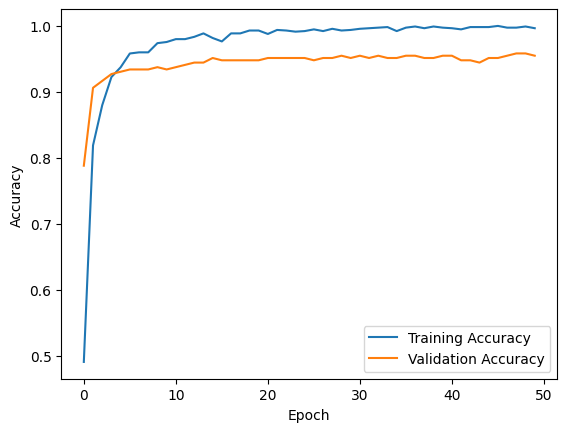

In [4]:
# Evaluate, save model, visualization, main function

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

model.save('digit_model.h5')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('training_history.png')
plt.show()

def predict_digit(image_array):
    model = keras.models.load_model('digit_model.h5')
    prediction = model.predict(image_array.reshape(1, -1))
    return np.argmax(prediction)

In [7]:
print("\n" + "="*50)
print("PREDICTIONS FOR FIRST 5 TEST SAMPLES")
print("="*50)

predictions = model.predict(X_test[:5])
for i in range(5):
    print(f"\n--- Sample {i+1} ---")
    true_label = y_test[i]
    pred_probs = predictions[i]
    predicted_class = np.argmax(pred_probs)
    confidence = np.max(pred_probs)

    print(f"True label: {true_label}")
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.4f} ({confidence*100:.2f}%)")

    print("All class probabilities:")
    for class_idx, prob in enumerate(pred_probs):
        print(f"  Class {class_idx}: {prob:.4f}")

    if predicted_class == true_label:
        print("CORRECT prediction")
    else:
        print("WRONG prediction")

correct_predictions = sum([1 for i in range(5) if np.argmax(predictions[i]) == y_test[i]])
accuracy_5_samples = correct_predictions / 5 * 100

print(f"Correct predictions: {correct_predictions}/5")
print(f"Accuracy on first 5 samples: {accuracy_5_samples:.1f}%")



PREDICTIONS FOR FIRST 5 TEST SAMPLES
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

--- Sample 1 ---
True label: 6
Predicted class: 6
Confidence: 0.9999 (99.99%)
All class probabilities:
  Class 0: 0.0000
  Class 1: 0.0000
  Class 2: 0.0000
  Class 3: 0.0000
  Class 4: 0.0000
  Class 5: 0.0000
  Class 6: 0.9999
  Class 7: 0.0000
  Class 8: 0.0000
  Class 9: 0.0000
CORRECT prediction

--- Sample 2 ---
True label: 9
Predicted class: 9
Confidence: 0.9991 (99.91%)
All class probabilities:
  Class 0: 0.0000
  Class 1: 0.0000
  Class 2: 0.0000
  Class 3: 0.0000
  Class 4: 0.0000
  Class 5: 0.0009
  Class 6: 0.0000
  Class 7: 0.0000
  Class 8: 0.0000
  Class 9: 0.9991
CORRECT prediction

--- Sample 3 ---
True label: 3
Predicted class: 3
Confidence: 1.0000 (100.00%)
All class probabilities:
  Class 0: 0.0000
  Class 1: 0.0000
  Class 2: 0.0000
  Class 3: 1.0000
  Class 4: 0.0000
  Class 5: 0.0000
  Class 6: 0.0000
  Class 7: 0.0000
  Class 8: 0.0000
  Class 9: 0.0000
CORRECT prediction

--- Sample 4 